# BST 267: Introduction to Social and Biological Networks (2022)

# Homework 5

In [2]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

### Question 1: Mechanistic model with growth and preferential attachment (2 points)

In this question you will implement the BA model:
- Step 0: Start the algorithm from a seed network, which we take to be a 3-cycle
- Step 1: Add a new node to the network; each new node has `m` stubs
- Step 2: Connect a stub of the new node to an existing node with probability proportional to the degree of the target node
- Step 3: Repeat Steps 1 & 2 until the network has `n` nodes

Implement this model as a function called `BA_model`. The input consists of two parameters: degree of new nodes `m` and the number of nodes in the final network (including seed) `n`. You can ignore multi-edges, i.e., if the same node gets picked for attachment more than once during a round, only the first one counts. The function should return the graph as its output.

In [3]:
# ADD YOUR CODE HERE
def BA_model(m, n):
    """input consists of two parameters: degree of new nodes `m` and 
    the number of nodes in the final network (including seed) `n`.
    You can ignore multi-edges, 
    i.e., if the same node gets picked for attachment more than once during a round, 
    only the first one counts. 
    he function should return the graph as its output."""
    nodes_repeat = [0, 0, 1, 1, 2, 2]  
    targets = np.random.choice(nodes_repeat, size = m, replace = True)
    #- Step 0: Start the algorithm from a seed network, which we take to be a 3-cycle
    G = nx.cycle_graph(3)
    #- Step 1: Add a new node to the network; each new node has `m` stubs
    for i in range(n):
        G.add_edges_from(zip([i]*m, targets))
    #- Step 2: Connect a stub of the new node to an existing node with probability proportional to the degree of the target node
        nodes_repeat.extend(targets)
        nodes_repeat.extend([i]*m)
        targets = np.random.choice(nodes_repeat, size = m, replace = True)
    return G

### Question 2: Node degree and node insertion time (2 points)

Generate one graph realization from the BA model `n=10000` and `m=2`. Divide the nodes of the graph into groups of 100 based on the time they were inserted to the network, i.e., the first group has the 100 nodes that were added first, the next group has the subsequent 100 nodes, and so on. Plot the mean degree of the nodes in each group on the y-axis vs. mean insertion time of nodes in each group on the x-axis. (To simplify code, you can assume in the first group that the seed nodes were added at times 0, 1, and 2.) Write a short interpretation of the plot.

<IPython.core.display.Javascript object>


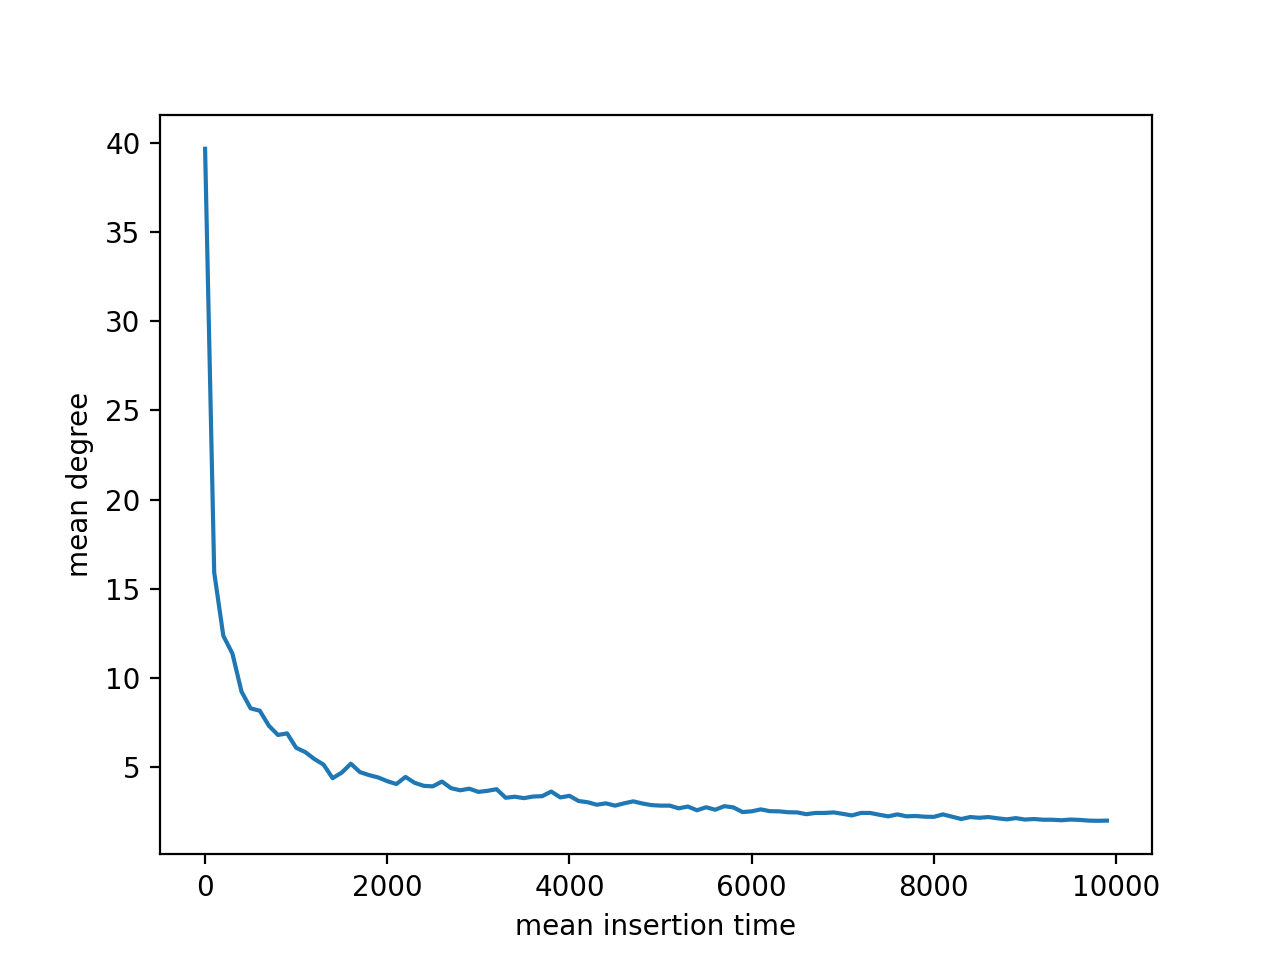

In [35]:
# ADD YOUR CODE HERE
# Generate one graph realization from the BA model `n=10000` and `m=2`. 
n = 10000
m = 2
G2 = BA_model(m, n)
# Divide the nodes of the graph into groups of 100 based on the time they were inserted to the network, 
# i.e., the first group has the 100 nodes that were added first, the next group has the subsequent 100 nodes, and so on.
group = []
for i in range(0, n, 100):
    group.append(list(range(i, i+100)))
# For each group, compute the average degree of the nodes in the group.
avg_degree = []
for i in group:
    avg_degree.append(np.mean([G2.degree(j) for j in i]))

# Plot the mean degree of the nodes in each group on the y-axis vs. mean insertion time of nodes in each group on the x-axis. 
# (To simplify code, you can assume in the first group that the seed nodes were added at times 0, 1, and 2.) 
plt.figure()
plt.plot(range(0, n, 100), avg_degree)
plt.xlabel('mean insertion time')
plt.ylabel('mean degree')
plt.show()

**Interpret:**
From the plot above, we can see that the average degree of the nodes in each group is degreasing with the mean insertion time of nodes increased in each group. We can also see that the decreasing is pretty fast at the begining of the mean insertation time increasing, which may due to that nodes in front are very likely to be chosen to connect a new edge. 

### Question 3: Snowball sampling (2 points)

This question is an opportunity for us to learn a bit about network sampling. Although we haven't talked about sampling in class, you're certainly familiar with sampling in other contexts, such as opinion polling. **Snowball sampling** can be used to obtain samples of social networks, and it's often used to study what are known as hidden populations, such as sex workers and illegal immigrants. The idea is that members of the target population are likely to be connected with one another, and therefore a person included in the sample may be used to identify others to be included in the sample.

In snowball sampling, you first identify an initial member of the population of interest, let's call this our `source` node. Upon gaining their confidence, you invite them to name other members of the target population they are connected to (their network neighbors). You then find those acquaintances and interview them in turn, asking them to name their contacts. This gives rise to layers or waves of sampling and soon the process "snowballs."

Write a function called `snowball` to generate a snowball sample of nodes. The function should take the following inputs: the underlying graph `G`, `source` (starting) node, and sampling depth parameter `depth` (maximum depth of sample from the source). We will assume that everyone is fully compliant with the sampling procedure. The function should return a set of the nodes in the sample.

If you review Lecture 3 and explore NetworkX documentation, your function might be as short as just a couple of lines of code.


In [36]:
# ADD YOUR CODE HERE
def snowball(G, source, depth): 
    """generate a snowball sample of nodes. 
    Inputs: the underlying graph `G`, 
    `source` (starting) node, 
    and sampling depth parameter `depth` (maximum depth of sample from the source)
    return a set of the nodes in the sample."""
    S = set()
    S.add(source)
    for i in range(depth):
        for j in S.copy():
            S = S.union(set(G.neighbors(j)))
    return S

### Question 4: Population vs. sample degree distributions (2 points)

Generate one graph realization from the BA model using `n=100000` and `m=2`. (Your BA model may be slow for such a large graph, so feel free to use the faster NetworkX implementation of the model.) Next, generate 50 snowball samples from the network, each time starting from a randomly selected node, and limit the depth of each sample to 3. Plot the degree distribution of the original (population) graph and those of the sample graphs. Select the type of visualization (lin-lin plot, log-log plot, etc.) that best illustrates the possible differences in degree distribution. Write a brief description of the differences you observe.


In [23]:
# ADD YOUR CODE HERE
# Generate one graph realization from the BA model using `n=100000` and `m=2`. 
n = 100000
m = 2
G4 = BA_model(m, n)

<IPython.core.display.Javascript object>


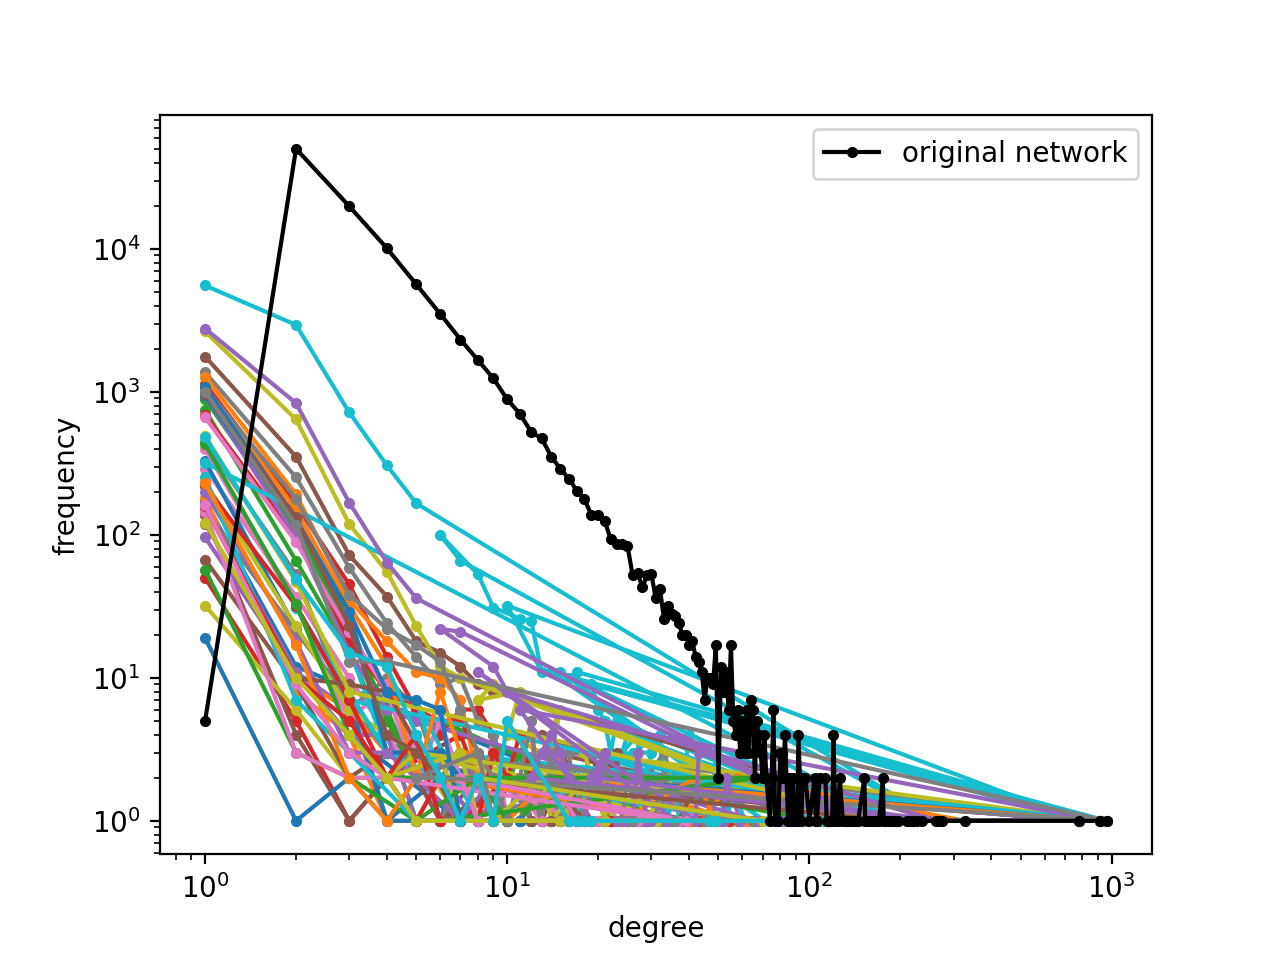

In [34]:
plt.figure()
# generate 50 snowball samples from the network, 
# each time starting from a randomly selected node, and limit the depth of each sample to 3. 
samples = []
for i in range(50):
    source = random.randint(0, n-1)
    samples.append(snowball(G4, source, 3))
    S = G4.subgraph(samples[i])
    degree_sequence = [S.degree(node) for node in S.nodes()]
    degrees = list(set(degree_sequence))
    frequency = [degree_sequence.count(i) for i in degrees]
    plt.loglog(degrees, frequency, ".-")

# Plot the degree distribution of the network on the same plot.
degree_sequence = [G4.degree(node) for node in G4.nodes()]
degrees = list(set(degree_sequence))
frequency = [degree_sequence.count(i) for i in degrees]
plt.loglog(degrees, frequency, ".-", color="black", label = 'original network')
plt.xlabel('degree')
plt.ylabel('frequency')
plt.legend()
plt.show()


Seeing from my log-log frequency plot, we can see that the 50 samples are mostly below the original population (except for the degree =1 one). This may because samples - subgraphs - have less nodes than the whole graph. Additionally, we can also observe that the distribution of the 50 samples are mostly steeper than the original population, indicating that there are fewer nodes with higher degrees in the samples than in the population. This is likely due to the sampling procedure, as the samples are taken from a subset of the population.